In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__

'2.4.0'

In [2]:
from tensorflow.keras.layers import Embedding

In [3]:
embedding_layer = Embedding(1000, 64)

In [4]:
import tensorflow.keras.datasets.imdb as imdb
from tensorflow.keras import preprocessing
max_words = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_words)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [5]:
len(x_train[0])

100

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
model = Sequential()
model.add(Embedding(10000, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 323,201
Trainable params: 323,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5398 - acc: 0.7360 - val_loss: 0.3730 - val_acc: 0.8374
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2981 - acc: 0.8778 - val_loss: 0.3438 - val_acc: 0.8482
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.2299 - acc: 0.9085 - val_loss: 0.3309 - 

In [7]:
history.history

{'loss': [0.5398392081260681,
  0.29809483885765076,
  0.2298533171415329,
  0.1816575974225998,
  0.13594767451286316,
  0.0938703864812851,
  0.05947818607091904,
  0.03429734706878662,
  0.01818844862282276,
  0.009113195352256298],
 'acc': [0.7360000014305115,
  0.8778499960899353,
  0.9084500074386597,
  0.9309999942779541,
  0.9524000287055969,
  0.9710999727249146,
  0.9854999780654907,
  0.9940999746322632,
  0.9978500008583069,
  0.9991499781608582],
 'val_loss': [0.37298911809921265,
  0.34383857250213623,
  0.33091843128204346,
  0.3340950012207031,
  0.3623081147670746,
  0.3686048984527588,
  0.39551612734794617,
  0.42503875494003296,
  0.4733559191226959,
  0.5072357654571533],
 'val_acc': [0.8374000191688538,
  0.8482000231742859,
  0.8557999730110168,
  0.8592000007629395,
  0.8519999980926514,
  0.8564000129699707,
  0.8468000292778015,
  0.8432000279426575,
  0.8384000062942505,
  0.8371999859809875]}

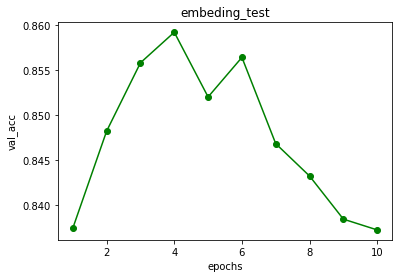

In [8]:
val_acc = history.history['val_acc']
epochs = range(1, len(val_acc)+1)
#可使用axis设定坐标轴取值范围
#plt.axis
plt.plot(epochs, val_acc, 'bo-', color='green', label='val_acc_haha')
plt.xlabel('epochs')
plt.ylabel('val_acc')
plt.title('embeding_test')
plt.show()

In [9]:
val_acc

[0.8374000191688538,
 0.8482000231742859,
 0.8557999730110168,
 0.8592000007629395,
 0.8519999980926514,
 0.8564000129699707,
 0.8468000292778015,
 0.8432000279426575,
 0.8384000062942505,
 0.8371999859809875]